# Statistical analysis in Python

This notebook shows how to read, plot and analyse data in Python.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

First, we're going to use Pandas to read our experiment data. In this example, we have measured the execution time of two algorithms. Each algorithm was run 1000 times on the same machine, under the same operating conditions, over the same sets of input data. Our hypothesis is that _Algorithm 1_ will be faster than _Algorithm 2_. We can state this belief in the form of a null and alternate hypothesis:

$H_0$: _Algorithm 1_ will **not** have faster execution times than _Algorithm 2_

$H_A$: _Algorithm 1_ will have faster execution times than _Algorithm 2_

In [2]:
data = pd.read_csv("data.csv")
data.agg(['mean', 'std'])

,Algorithm 1,Algorithm 2
mean,2019.462084,2134.738268
std,213.140030,148.589010


We now have a _data frame_ containing our data, with one column for each algorithm. Using the `agg` function from `pandas`, we can compute some aggregate statistics for each algorithm. We can see that _Algorithm 1_ was, on average, faster than _Algorithm 2_. However, this is insufficient evidence to support our conclusion. A simple aggregation is not strong enough for us to reject the null hypothesis.

Rather than jump straight into analysis, we should plot our data to get a rough idea of what performance for each algorithm looks like. Let's begin with a simple plot, to informally assess performance.

Text(0.5, 0, 'Time (ms)')

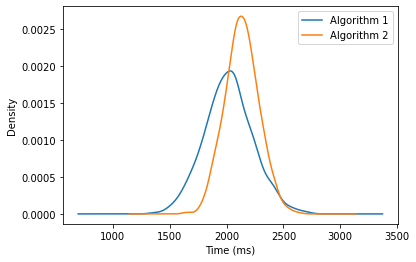

In [9]:
plot = data.plot.density()
plot.set_xlabel("Time (ms)")

This plot shows the distribution of execution times. At first glance, we can see that _Algorithm 1_ was slightly faster and had more variance in execution time (i.e., it has a wider curve than _Algorithm 2_). However, this visual inspection is still not enough for us to draw a conclusion from. We need stronger evidence if we are to reject $H_0$.

In this case we have two sets of data, with observations that are independent of each other. The most appropriate test for such a comparison is the independent measures t-test. Using the `stats.ttest_ind` function from `scipy`, we can perform a t-test comparison of our two sets of time data.

In [11]:
t, p = stats.ttest_ind(data["Algorithm 1"], data["Algorithm 2"])

print("t = {:0.02f}, p = {}".format(t, p))

t = -14.03, p = 1.0119544702854475e-42


The results from this test shows a t-statistic of $-14.03$ and a p-value of $< 0.001$, meaning the probability of obtaining this result by chance is below 0.1%. This probability is below our $\alpha = 0.05$, therefore we can reject the null hypothesis $H_0$ and accept the alternative hypothesis $H_A$, i.e., that _Algorithm 1_ is faster than _Algorithm 2_.